In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a sample dataset
np.random.seed(0)
data = pd.DataFrame({
    'Churn': np.random.choice([0, 1], size=1000),
    'Feature1': np.random.rand(1000),
    'Feature2': np.random.rand(1000),
    'Feature3': np.random.choice(['A', 'B', 'C'], size=1000)
})

# Encode categorical variables
le = LabelEncoder()
data['Feature3'] = le.fit_transform(data['Feature3'])

# Prepare features and target
X = data.drop("Churn", axis=1)
y = data["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train[['Feature1', 'Feature2']] = scaler.fit_transform(X_train[['Feature1', 'Feature2']])
X_test[['Feature1', 'Feature2']] = scaler.transform(X_test[['Feature1', 'Feature2']])

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\n=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\n=== XGBoost Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Explain XGBoost with SHAP
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)




=== Logistic Regression Results ===
Accuracy: 0.46
[[56 30]
 [78 36]]
              precision    recall  f1-score   support

           0       0.42      0.65      0.51        86
           1       0.55      0.32      0.40       114

    accuracy                           0.46       200
   macro avg       0.48      0.48      0.45       200
weighted avg       0.49      0.46      0.45       200


=== Random Forest Results ===
Accuracy: 0.5
[[51 35]
 [65 49]]
              precision    recall  f1-score   support

           0       0.44      0.59      0.50        86
           1       0.58      0.43      0.49       114

    accuracy                           0.50       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.52      0.50      0.50       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:29:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost Results ===
Accuracy: 0.45
[[43 43]
 [67 47]]
              precision    recall  f1-score   support

           0       0.39      0.50      0.44        86
           1       0.52      0.41      0.46       114

    accuracy                           0.45       200
   macro avg       0.46      0.46      0.45       200
weighted avg       0.47      0.45      0.45       200



In [2]:
#Handling Missing Values
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample data
data = {'TotalCharges': [29.99, None, 19.99, None, 49.99]}
df = pd.DataFrame(data)

# Identify missing values
print("Missing values before imputation:")
print(df.isnull().sum())

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df['Totalcharges'] = imputer.fit_transform(df[['TotalCharges' ]])

print("\nData after imputation:")
print(df)

Missing values before imputation:
TotalCharges    2
dtype: int64

Data after imputation:
   TotalCharges  Totalcharges
0         29.99     29.990000
1           NaN     33.323333
2         19.99     19.990000
3           NaN     33.323333
4         49.99     49.990000


In [3]:
#Removing Duplicates
# Sample data with duplicates
data = {'CustomerID': [1, 2, 2, 3], 'TotalCharges': [29.99, 19.99, 19.99, 49.99]}
df = pd.DataFrame(data)

# Remove duplicates
df = df.drop_duplicates()

print("Data after removing duplicates:")
print(df)

Data after removing duplicates:
   CustomerID  TotalCharges
0           1         29.99
1           2         19.99
3           3         49.99


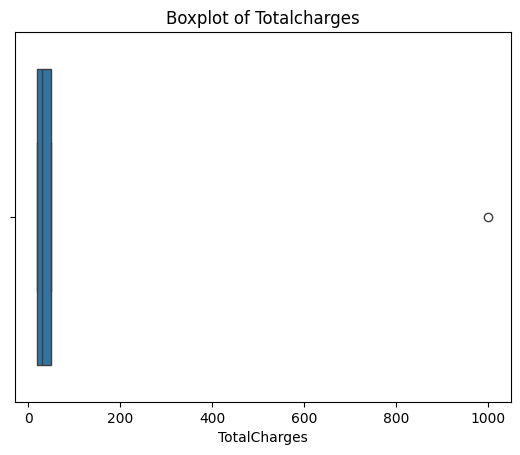

In [4]:
#Detecting and Handling Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {'TotalCharges': [29.99, 19.99, 19.99, 49.99, 1000.00]}
df = pd.DataFrame(data)

# Boxplot to visualize outliers
sns.boxplot(x=df['TotalCharges'])
plt.title("Boxplot of Totalcharges")
plt.show()

In [5]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year']}
df = pd.DataFrame(data)

# Label Encoding for binary categorical variable
label_encoder = LabelEncoder()
df['Contract_encoded'] = label_encoder.fit_transform(df['Contract'])

print("Data after Label Encoding:")
print(df)

Data after Label Encoding:
         Contract  Contract_encoded
0  Month-to-month                 0
1        One year                 1
2  Month-to-month                 0
3        Two year                 2


In [8]:
from sklearn.preprocessing import StandardScaler

# Sample data
data = {'TotalCharges': [29.99, 19.99, 19.99, 49.99, 1000.00]}
df = pd.DataFrame(data)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the 'TotalCharges' column
df['TotalCharges_scaled'] = scaler.fit_transform(df[['TotalCharges']])

print("Data after Scaling:")
print(df)


Data after Scaling:
   TotalCharges  TotalCharges_scaled
0         29.99            -0.499801
1         19.99            -0.525564
2         19.99            -0.525564
3         49.99            -0.448276
4       1000.00             1.999203


In [9]:
import pandas as pd

# Sample data
data = {
    'PhoneService': [1, 1, 0, 1],
    'MultipleLines': [1, 0, 1, 1],
    'InternetService': [1, 1, 0, 1],
    'OnlineSecurity': [1, 0, 0, 1],
    'OnlineBackup': [1, 1, 0, 1],
    'DeviceProtection': [0, 1, 0, 1],
    'TechSupport': [1, 0, 0, 1],
    'StreamingTV': [1, 1, 0, 1],
    'StreamingMovies': [0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Create 'TotalServices' feature
df['TotalServices'] = df.sum(axis=1)

print("Data with 'TotalServices' feature:")
print(df)


Data with 'TotalServices' feature:
   PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             1              1                1               1             1   
1             1              0                1               0             1   
2             0              1                0               0             0   
3             1              1                1               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  TotalServices  
0                 0            1            1                0              7  
1                 1            0            1                1              6  
2                 0            0            0                0              1  
3                 1            1            1                1              9  


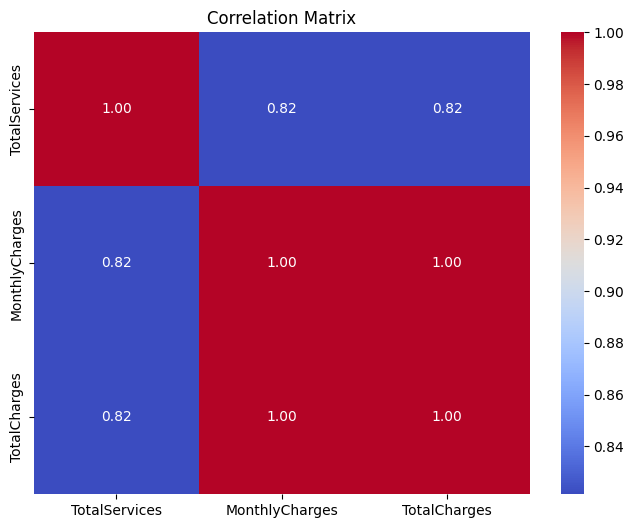

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'TotalServices': [7, 5, 2, 9],
    'MonthlyCharges': [70, 80, 60, 90],
    'TotalCharges': [700, 800, 600, 900]
}
df = pd.DataFrame(data)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Sample data
X = df[['TotalServices', 'MonthlyCharges']]
y = [0, 1, 0, 1]  # Churn labels

# Initialize and fit model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.4f}')


TotalServices: 0.3721
MonthlyCharges: 0.6279


In [12]:
import numpy as np

# Sample data
df['LogTotalCharges'] = np.log1p(df['TotalCharges'])

print("Data with log-transformed 'TotalCharges':")
print(df[['TotalCharges', 'LogTotalCharges']])


Data with log-transformed 'TotalCharges':
   TotalCharges  LogTotalCharges
0           700         6.552508
1           800         6.685861
2           600         6.398595
3           900         6.803505


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.65      0.51        86
           1       0.55      0.32      0.40       114

    accuracy                           0.46       200
   macro avg       0.48      0.48      0.45       200
weighted avg       0.49      0.46      0.45       200



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.55      0.47        86
           1       0.55      0.41      0.47       114

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.49      0.47      0.47       200



In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Calculate scale_pos_weight
scale_pos_weight = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

# Initialize and train the model
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.53      0.46        86
           1       0.52      0.39      0.44       114

    accuracy                           0.45       200
   macro avg       0.46      0.46      0.45       200
weighted avg       0.47      0.45      0.45       200




=== Logistic Regression Results ===
Accuracy: 0.46
[[56 30]
 [78 36]]
              precision    recall  f1-score   support

           0       0.42      0.65      0.51        86
           1       0.55      0.32      0.40       114

    accuracy                           0.46       200
   macro avg       0.48      0.48      0.45       200
weighted avg       0.49      0.46      0.45       200


=== Random Forest Results ===
Accuracy: 0.5
[[51 35]
 [65 49]]
              precision    recall  f1-score   support

           0       0.44      0.59      0.50        86
           1       0.58      0.43      0.49       114

    accuracy                           0.50       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.52      0.50      0.50       200


=== XGBoost Results ===
Accuracy: 0.45
[[43 43]
 [67 47]]
              precision    recall  f1-score   support

           0       0.39      0.50      0.44        86
           1       0.52      0.41      0.46

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:29:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


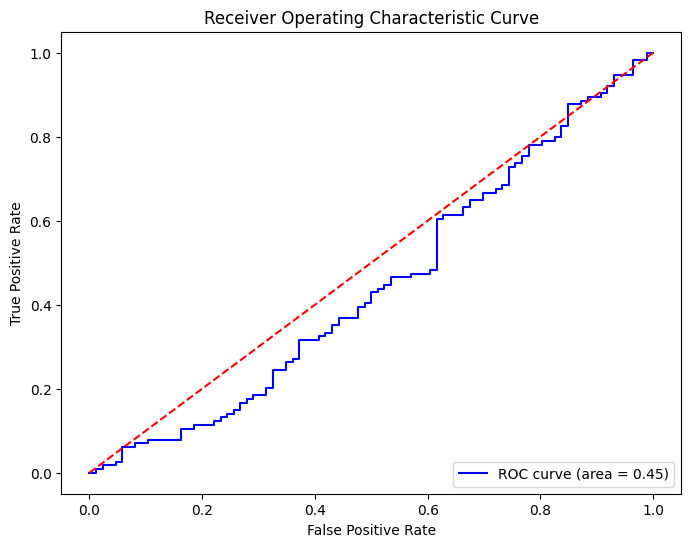

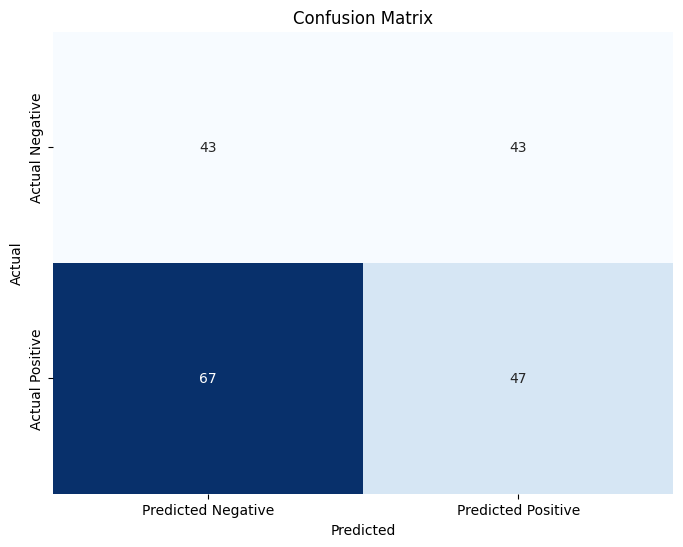

<ipython-input-17-357674ee4b0f>:93: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


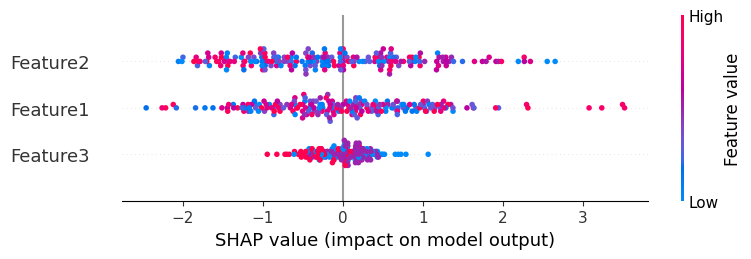

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Create a sample dataset
np.random.seed(0)
data = pd.DataFrame({
    'Churn': np.random.choice([0, 1], size=1000),
    'Feature1': np.random.rand(1000),
    'Feature2': np.random.rand(1000),
    'Feature3': np.random.choice(['A', 'B', 'C'], size=1000)
})

# Encode categorical variables
le = LabelEncoder()
data['Feature3'] = le.fit_transform(data['Feature3'])

# Prepare features and target
X = data.drop("Churn", axis=1)
y = data["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train[['Feature1', 'Feature2']] = scaler.fit_transform(X_train[['Feature1', 'Feature2']])
X_test[['Feature1', 'Feature2']] = scaler.transform(X_test[['Feature1', 'Feature2']])

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_prob = lr_model.predict_proba(X_test)[:, 1]
print("\n=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]
print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]
print("\n=== XGBoost Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# ROC Curve for XGBoost
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Explain XGBoost with SHAP
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Summary plot to visualize hidden patterns
shap.summary_plot(shap_values, X_test)
